<font size="20">Predicting Stock Market Trends Using Predictive Analytics, Exploratory Data Analysis</font>

Author: Yagnesh Rajani

<font size="20" color = "Blue">Libraries, Packages and Data Setup</font>

Install and Import Libraries and Packages

In [20]:
# Install Libraries
#%pip install ydata-profiling
#%pip install numpy
#%pip install pandas
#%pip install seaborn
#%pip install matplotlib
#%pip install ipywidgets
#%pip install sweetviz


# Import Libraries and Packages
import numpy as np
import pandas as pd
from pandas_profiling import ydata_profiling
import seaborn as sns
from matplotlib import pyplot as plt
import sweetviz as sv
from datetime import datetime
from collections import Counter
from datetime import datetime as dt
from datetime import timezone as tz

Import Datasets

In [2]:
# Load selected dataset into a dataframe
initial_data = pd.DataFrame(pd.read_csv("DIS.csv", sep = ",", header = 0))

<font size="20" color = "Blue">Exploratory Data Analysis</font>

<font size="6" color = "Orange">Select and Format Relevant Data</font>

In [3]:
initial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15447 entries, 0 to 15446
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             15447 non-null  object 
 1   Open             15447 non-null  float64
 2   High             15447 non-null  float64
 3   Low              15447 non-null  float64
 4   Close            15447 non-null  float64
 5   Volume           15447 non-null  int64  
 6   Dividends        15447 non-null  float64
 7   Stock Splits     15447 non-null  float64
 8   STOCHk_14_3_3    15432 non-null  float64
 9   STOCHd_14_3_3    15430 non-null  float64
 10  RSI_14           15433 non-null  float64
 11  CMO_14           15433 non-null  float64
 12  CCI_14_0.015     15434 non-null  float64
 13  MACD_12_26_9     15422 non-null  float64
 14  MACDh_12_26_9    15414 non-null  float64
 15  MACDs_12_26_9    15414 non-null  float64
 16  PPO_12_26_9      15422 non-null  float64
 17  PPOh_12_26_9

In [4]:
# Select relevant attributes
attribute_list = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']

# Create new dataframe with selected attributes
DIS_data = initial_data[attribute_list]

# Date is separated to convert it from an object to a datetime
date = initial_data['Date']

Convert "Date" from an object to datetime

In [5]:
# Convert date to a datetime format
date = pd.to_datetime(date, errors = 'coerce', utc = 'False', format = "%Y-%m-%d %H:%M:%S%z")

# Insert the dates into the DIS_Data dataframe
DIS_data.insert(0, "Date", date)

In [6]:
DIS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15447 entries, 0 to 15446
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          15447 non-null  datetime64[ns, UTC]
 1   Open          15447 non-null  float64            
 2   High          15447 non-null  float64            
 3   Low           15447 non-null  float64            
 4   Close         15447 non-null  float64            
 5   Volume        15447 non-null  int64              
 6   Dividends     15447 non-null  float64            
 7   Stock Splits  15447 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 965.6 KB


<font size="6" color = "Orange">Explore Data</font>

In [7]:
DIS_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02 05:00:00+00:00,0.058398,0.060358,0.058398,0.058398,841958,0.0,0.0
1,1962-01-03 05:00:00+00:00,0.058398,0.059378,0.058398,0.059182,801865,0.0,0.0
2,1962-01-04 05:00:00+00:00,0.059182,0.059378,0.058791,0.059182,962238,0.0,0.0
3,1962-01-05 05:00:00+00:00,0.059182,0.059574,0.058987,0.059378,962238,0.0,0.0
4,1962-01-08 05:00:00+00:00,0.059378,0.060162,0.058007,0.059182,1282984,0.0,0.0


In [8]:
DIS_data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
15442,2023-05-08 04:00:00+00:00,101.699997,103.910004,101.690002,102.970001,10810100,0.0,0.0
15443,2023-05-09 04:00:00+00:00,102.910004,102.980003,102.089996,102.180000,6829900,0.0,0.0
15444,2023-05-10 04:00:00+00:00,103.000000,103.250000,100.040001,101.139999,19525200,0.0,0.0
15445,2023-05-11 04:00:00+00:00,94.800003,95.110001,91.879997,92.309998,57127200,0.0,0.0
15446,2023-05-12 04:00:00+00:00,92.339996,92.879997,91.239998,91.989998,21817200,0.0,0.0


In [9]:
# Check for missing values
print(DIS_data.isna().values.any())
# Verification
print(DIS_data.isna().sum())

False
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [10]:
DIS_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,15447.000000,15447.000000,15447.000000,15447.000000,1.544700e+04,15447.000000,15447.000000
mean,26.356199,26.614089,26.076154,26.351555,6.322459e+06,0.001026,0.001233
std,40.460926,40.822565,40.043184,40.434028,6.383563e+06,0.025900,0.059708
min,0.034612,0.034810,0.033228,0.034019,3.892500e+04,0.000000,0.000000
25%,0.683886,0.690725,0.677048,0.683887,2.550228e+06,0.000000,0.000000
50%,9.213409,9.308092,9.136950,9.240429,5.104105e+06,0.000000,0.000000
75%,27.759083,28.089534,27.399017,27.785858,8.188318e+06,0.000000,0.000000
max,200.190002,203.020004,195.399994,201.910004,2.058672e+08,1.150000,4.000000


Data Visuals

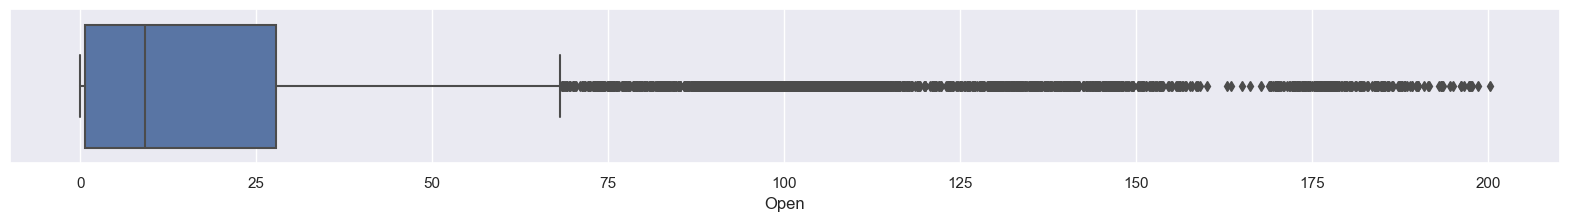

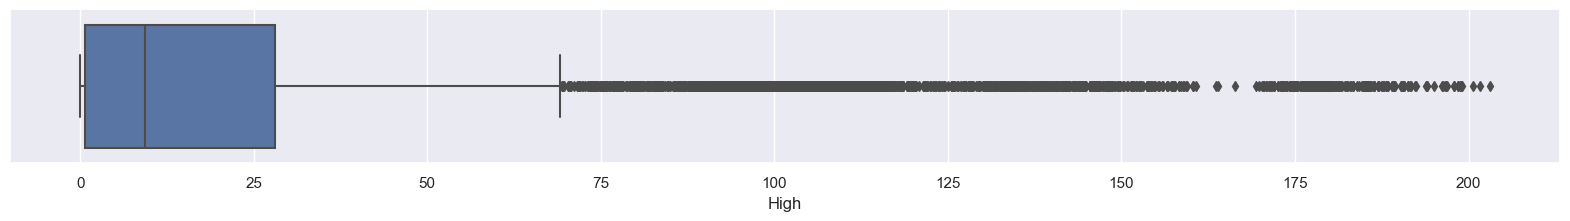

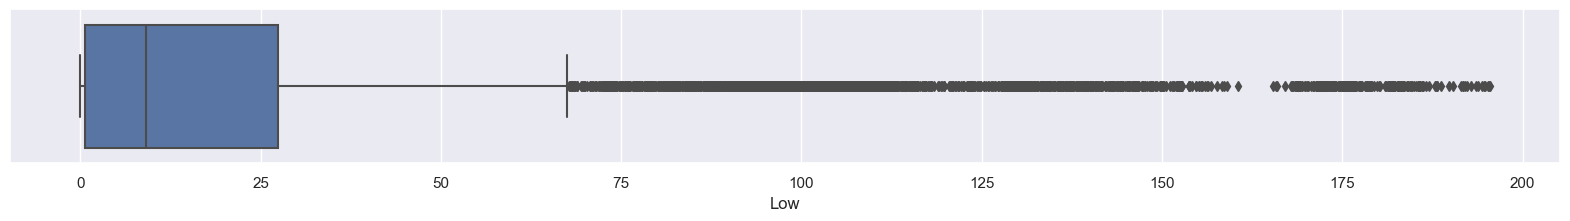

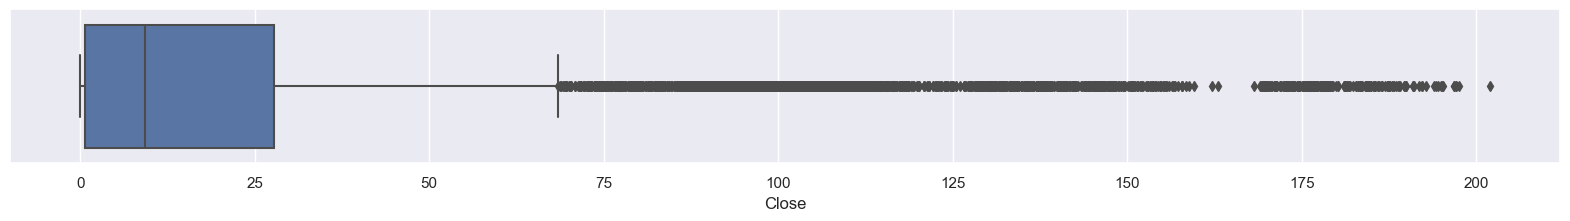

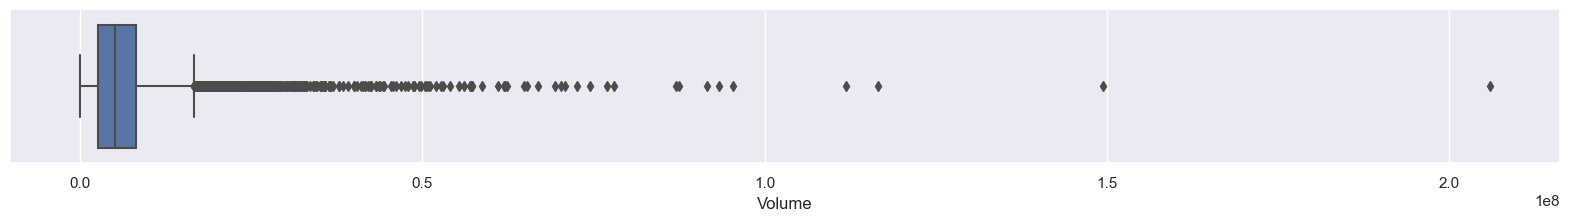

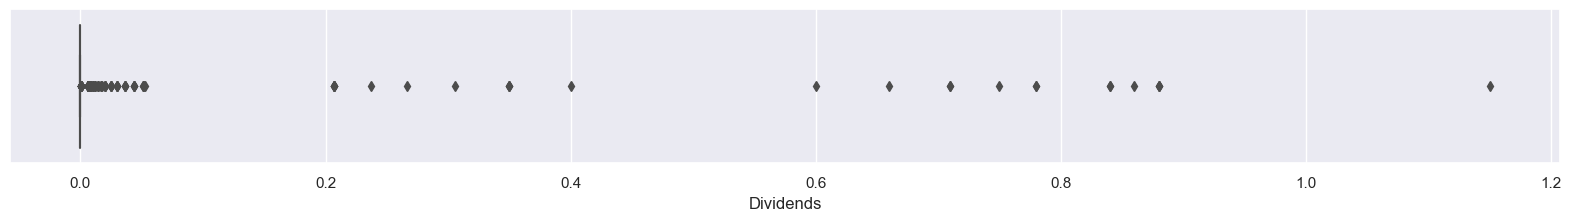

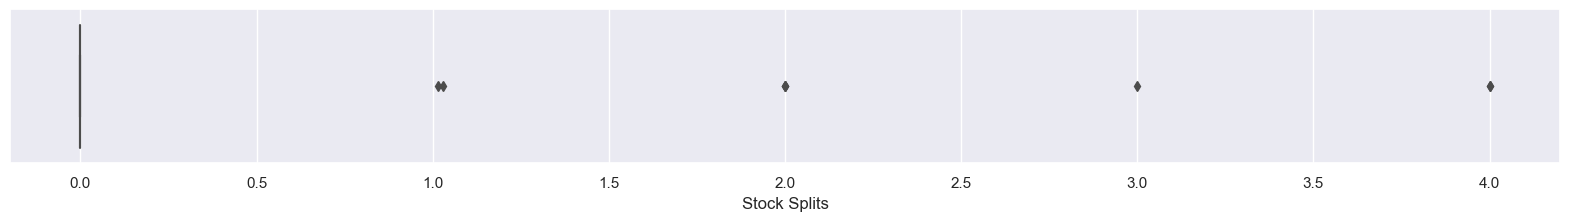

In [11]:
# Set styling
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(20, 2)})
# Display plots
sns.boxplot(data = DIS_data, x ="Open", orient='h')
plt.show()
sns.boxplot(data = DIS_data, x ="High", orient='h')
plt.show()
sns.boxplot(data = DIS_data, x ="Low", orient='h')
plt.show()
sns.boxplot(data = DIS_data, x ="Close", orient='h')
plt.show()
sns.boxplot(data = DIS_data, x ="Volume",  orient='h')
plt.show()
sns.boxplot(data = DIS_data, x ="Dividends", orient='h')
plt.show()
sns.boxplot(data = DIS_data, x ="Stock Splits",  orient='h')
plt.show()

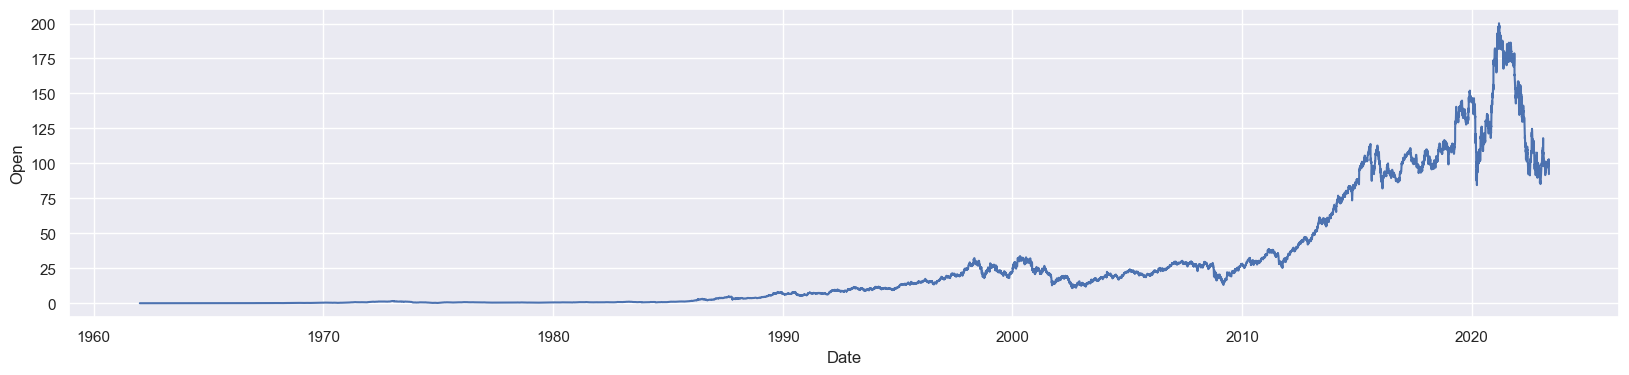

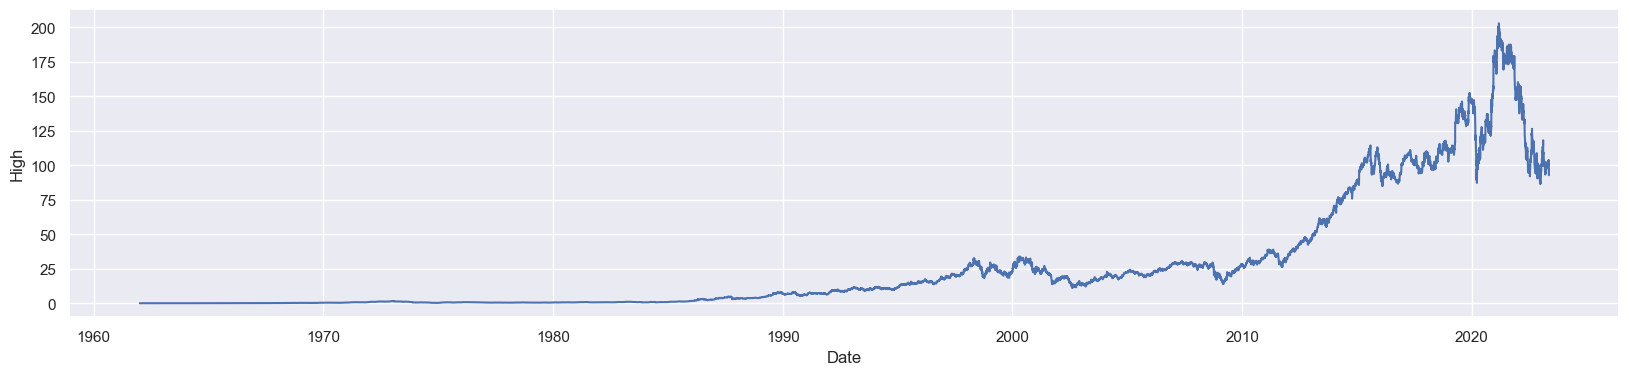

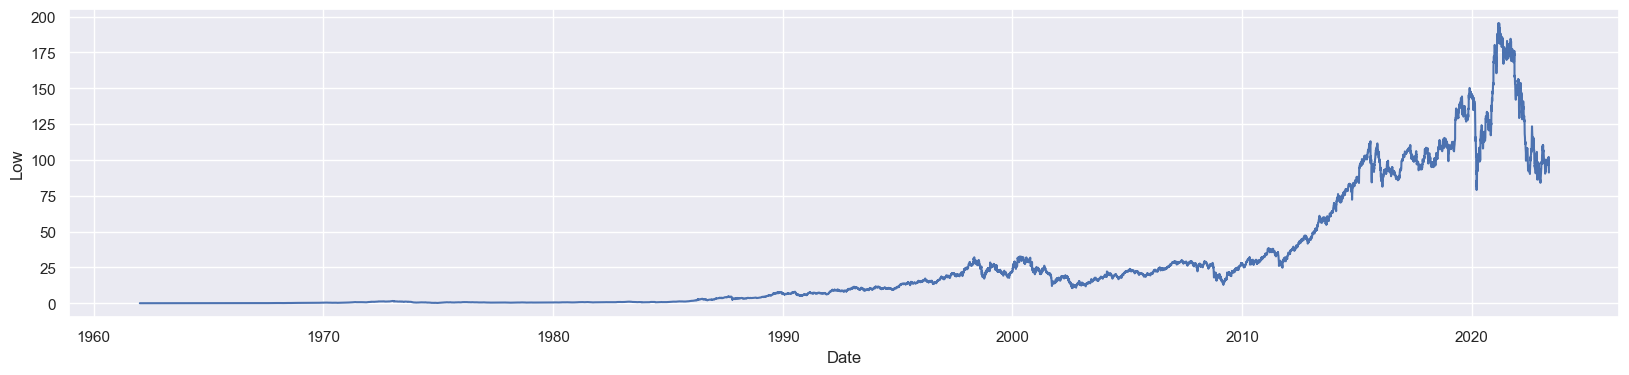

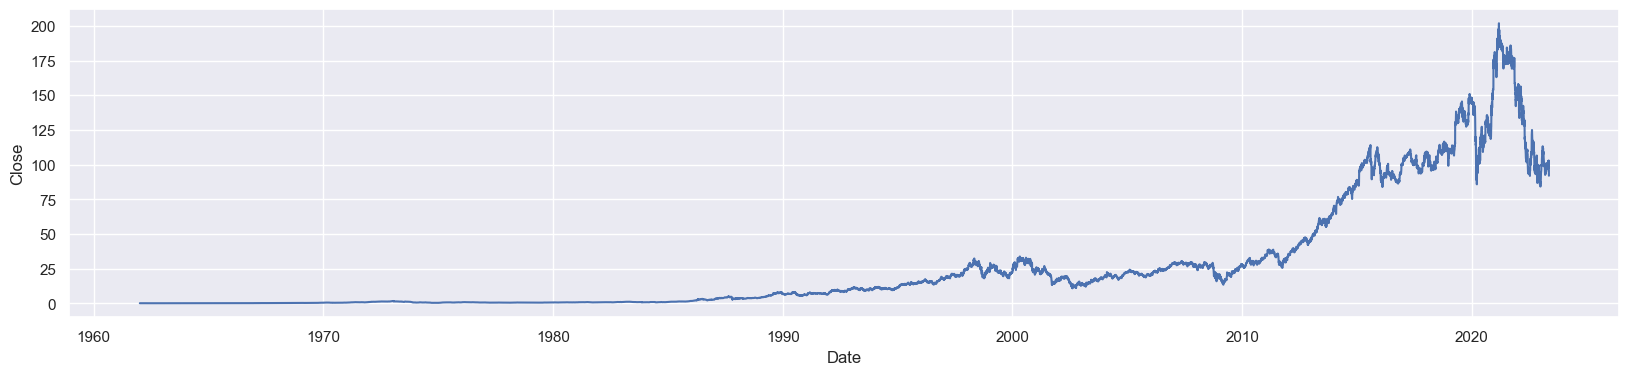

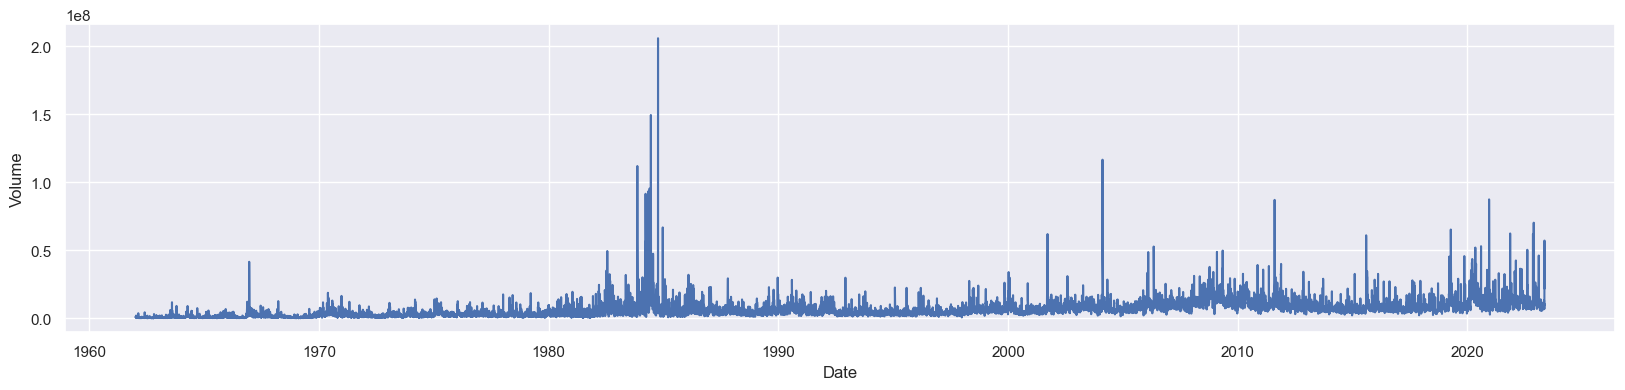

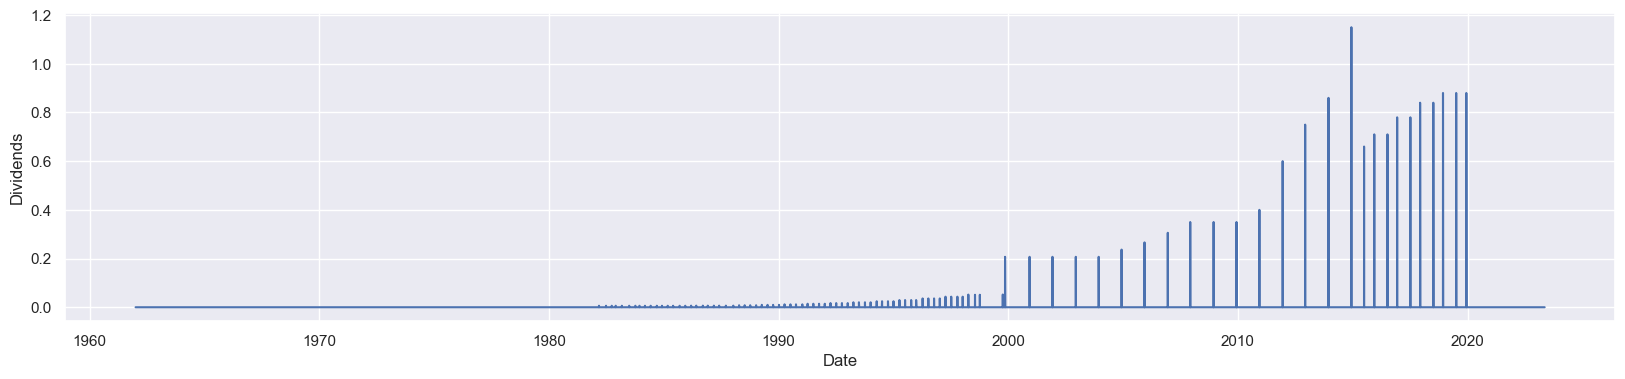

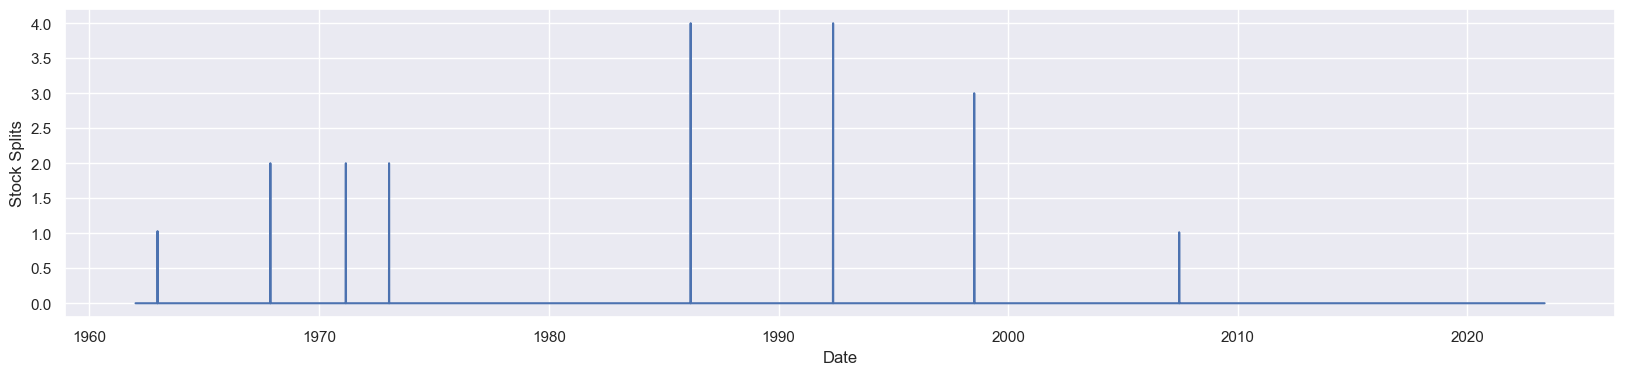

In [12]:
# Set styling
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(20, 4)})
# Display plots
sns.lineplot(data = DIS_data, x = "Date", y = "Open")
plt.show()
sns.lineplot(data = DIS_data, x = "Date", y = "High")
plt.show()
sns.lineplot(data = DIS_data, x = "Date", y = "Low")
plt.show()
sns.lineplot(data = DIS_data, x = "Date", y = "Close")
plt.show()
sns.lineplot(data = DIS_data, x = "Date", y = "Volume")
plt.show()
sns.lineplot(data = DIS_data, x = "Date", y = "Dividends")
plt.show()
sns.lineplot(data = DIS_data, x = "Date", y = "Stock Splits")
plt.show()

Outlier Detection

In [13]:
# Detect outliers and store their indices

def outlier_detector(df, attributes):
    outlier_indices = []
    for item in attributes:
        # 1st quartile
        Q1 = np.percentile(df[item],25)
        # 3rd quartile
        Q3 = np.percentile(df[item],75)
        # IQR
        IQR = Q3 - Q1
        # Whisker length
        whisker = IQR * 1.5
        # Detect outliers and their indices
        outlier_list = df[(df[item] < Q1 - whisker) | (df[item] > Q3 + whisker)].index
        # store indices
        outlier_indices.extend(outlier_list)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, val in outlier_indices.items() if val > 2)
    
    return multiple_outliers

In [14]:
# Display outliers
DIS_data.loc[outlier_detector(DIS_data,attribute_list)]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
13088,2013-12-30 05:00:00+00:00,69.014504,70.440996,68.922473,70.155701,8578900,0.0,0.0
13089,2013-12-31 05:00:00+00:00,70.201724,70.404195,69.769174,70.312164,4692300,0.0,0.0
13090,2014-01-02 05:00:00+00:00,69.980851,70.404196,69.852008,70.192520,5200900,0.0,0.0
13091,2014-01-03 05:00:00+00:00,70.220143,70.588264,69.953250,70.045280,4060700,0.0,0.0
13092,2014-01-06 05:00:00+00:00,70.431790,70.717085,69.474660,69.778366,6816200,0.0,0.0
...,...,...,...,...,...,...,...,...
15443,2023-05-09 04:00:00+00:00,102.910004,102.980003,102.089996,102.180000,6829900,0.0,0.0
15444,2023-05-10 04:00:00+00:00,103.000000,103.250000,100.040001,101.139999,19525200,0.0,0.0
15445,2023-05-11 04:00:00+00:00,94.800003,95.110001,91.879997,92.309998,57127200,0.0,0.0
15446,2023-05-12 04:00:00+00:00,92.339996,92.879997,91.239998,91.989998,21817200,0.0,0.0


Correlation Analysis

In [15]:
# Check correlation to fraud
DIS_data.corr()

C:\Users\Yagnesh\AppData\Local\Temp\ipykernel_21180\3772312597.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  DIS_data.corr()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.999939,0.999931,0.999876,0.301798,0.047644,-0.008927
High,0.999939,1.000000,0.999900,0.999939,0.303956,0.047548,-0.008978
Low,0.999931,0.999900,1.000000,0.999932,0.299288,0.047843,-0.009058
Close,0.999876,0.999939,0.999932,1.000000,0.301774,0.047686,-0.008965
Volume,0.301798,0.303956,0.299288,0.301774,1.000000,0.010251,0.004898
Dividends,0.047644,0.047548,0.047843,0.047686,0.010251,1.000000,-0.000807
Stock Splits,-0.008927,-0.008978,-0.009058,-0.008965,0.004898,-0.000807,1.000000


C:\Users\Yagnesh\AppData\Local\Temp\ipykernel_21180\924477629.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(DIS_data.corr(), annot=True, linewidths=.5, ax=ax)


<Axes: >

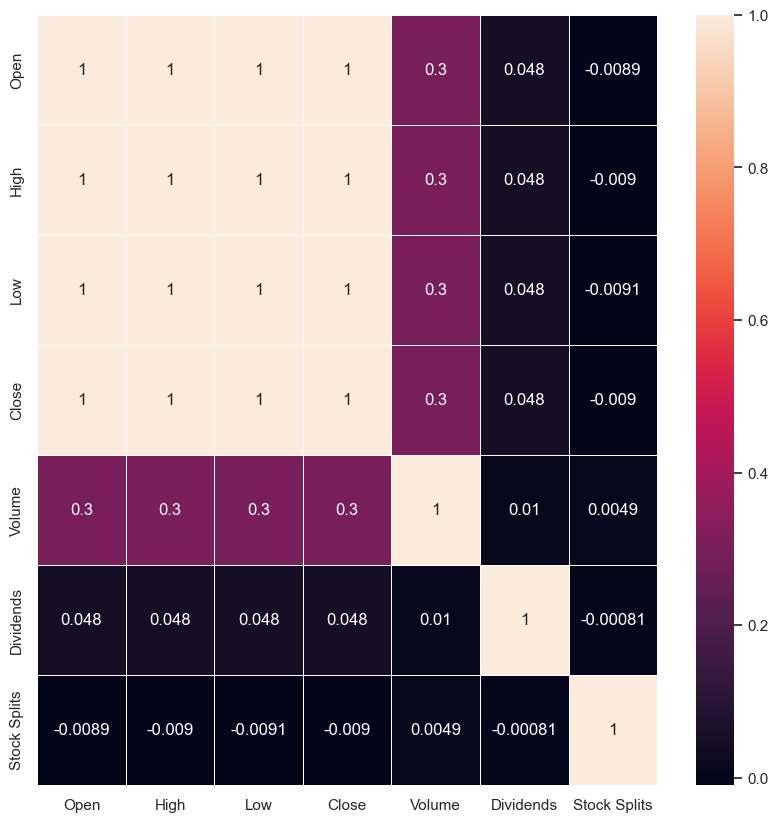

In [16]:
# Correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(DIS_data.corr(), annot=True, linewidths=.5, ax=ax)

<font size="20" color = "Blue">Save Modified Dataset</font>

In [19]:
DIS_data.to_csv("dataset.csv")